In [1]:
# Importing Libraries  
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go  
from plotly.subplots import make_subplots
import plotly.offline as py 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("cerealmixed.csv")
df.head()

Country Name  Year  Freshwater withdrawals (% internal)  \
0  Afghanistan  1961                                  NaN   
1  Afghanistan  1962                                  NaN   
2  Afghanistan  1963                                  NaN   
3  Afghanistan  1964                                  NaN   
4  Afghanistan  1965                                  NaN   

   Avg precipitation (mm/year)  CO2 emissions (kt)  Cereal yield (kg/hectare)  \
0                        327.0                 NaN                     1115.1   
1                        327.0                 NaN                     1079.0   
2                        327.0                 NaN                      985.8   
3                        327.0                 NaN                     1082.8   
4                        327.0                 NaN                     1098.9   

   Methane emissions (kt CO2 eq.)  Other GHG emissions (thousand tons)  
0                             NaN                                  NaN  
1                             NaN                                  NaN  
2                             NaN                                  NaN  
3                             NaN                                  NaN  
4                             NaN                                  NaN

In [3]:
df.columns

Index(['Country Name', 'Year', 'Freshwater withdrawals (% internal)',
       'Avg precipitation (mm/year)', 'CO2 emissions (kt)',
       'Cereal yield (kg/hectare)', 'Methane emissions (kt CO2 eq.)',
       'Other GHG emissions (thousand tons)'],
      dtype='object')

In [4]:
df.describe()

Year  Freshwater withdrawals (% internal)  \
count  11731.000000                          5735.000000   
mean    1992.107408                           138.560448   
std       17.549270                           694.749522   
min     1961.000000                             0.013759   
25%     1977.000000                             1.960100   
50%     1992.000000                            10.486926   
75%     2007.000000                            35.788101   
max     2022.000000                          7750.000000   

       Avg precipitation (mm/year)  CO2 emissions (kt)  \
count                 10016.000000        5.917000e+03   
mean                   1215.080072        1.418816e+05   
std                     813.254942        6.552881e+05   
min                      18.100000        0.000000e+00   
25%                     589.000000        1.447700e+03   
50%                    1113.000000        8.965700e+03   
75%                    1784.000000        5.819300e+04   
max                    3240.000000        1.094469e+07   

       Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
count               10079.000000                    5.918000e+03   
mean                 2488.745094                    3.899749e+04   
std                  2279.870427                    1.101856e+05   
min                     0.100000                    1.938977e+00   
25%                  1117.000000                    1.997003e+03   
50%                  1858.900000                    8.611032e+03   
75%                  3259.450000                    2.873178e+04   
max                 36761.900000                    1.186285e+06   

       Other GHG emissions (thousand tons)  
count                         8.662000e+03  
mean                          5.363146e+03  
std                           6.512407e+04  
min                          -4.151970e+05  
25%                          -5.816186e+02  
50%                           2.347054e+01  
75%                           1.285307e+03  
max                           1.719150e+06

In [5]:
df.dtypes

Country Name                            object
Year                                     int64
Freshwater withdrawals (% internal)    float64
Avg precipitation (mm/year)            float64
CO2 emissions (kt)                     float64
Cereal yield (kg/hectare)              float64
Methane emissions (kt CO2 eq.)         float64
Other GHG emissions (thousand tons)    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11731 entries, 0 to 11730
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Name                         11731 non-null  object 
 1   Year                                 11731 non-null  int64  
 2   Freshwater withdrawals (% internal)  5735 non-null   float64
 3   Avg precipitation (mm/year)          10016 non-null  float64
 4   CO2 emissions (kt)                   5917 non-null   float64
 5   Cereal yield (kg/hectare)            10079 non-null  float64
 6   Methane emissions (kt CO2 eq.)       5918 non-null   float64
 7   Other GHG emissions (thousand tons)  8662 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 733.3+ KB


In [7]:
df.shape

(11731, 8)

In [8]:
df.isna().sum()

Country Name                              0
Year                                      0
Freshwater withdrawals (% internal)    5996
Avg precipitation (mm/year)            1715
CO2 emissions (kt)                     5814
Cereal yield (kg/hectare)              1652
Methane emissions (kt CO2 eq.)         5813
Other GHG emissions (thousand tons)    3069
dtype: int64

In [9]:
df.rename(columns = {'Country Name' : 'Country'}, inplace = True)
df['Country'].value_counts()

Country
Afghanistan         62
Netherlands         62
Mauritius           62
Mexico              62
Mongolia            62
                    ..
Bermuda             17
Cayman Islands      16
Macao SAR, China    12
Gibraltar           11
French Polynesia    10
Name: count, Length: 206, dtype: int64

In [10]:
df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [11]:
df2 = df[df['Year'] >= 2000]
df2['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [12]:
df2.shape

(4446, 8)

In [13]:
df2['Country'].nunique()

195

In [14]:
df2.isna().sum()

Country                                   0
Year                                      0
Freshwater withdrawals (% internal)     922
Avg precipitation (mm/year)             681
CO2 emissions (kt)                      438
Cereal yield (kg/hectare)               357
Methane emissions (kt CO2 eq.)          438
Other GHG emissions (thousand tons)    1362
dtype: int64

In [15]:
country = df2[df2['Country'] == 'Bahrain']
country

Country  Year  Freshwater withdrawals (% internal)  \
710  Bahrain  2000                          7218.413462   
711  Bahrain  2001                          6808.108975   
712  Bahrain  2002                          6397.804487   
713  Bahrain  2003                          5967.500000   
714  Bahrain  2004                          5832.045455   
715  Bahrain  2005                          5696.590910   
716  Bahrain  2006                          5561.136363   
717  Bahrain  2007                          5425.681817   
718  Bahrain  2008                          5290.227273   
719  Bahrain  2009                          5154.772727   
720  Bahrain  2010                          5019.318183   
721  Bahrain  2011                          4883.863637   
722  Bahrain  2012                          4748.409090   
723  Bahrain  2013                          4612.954545   
724  Bahrain  2014                          4477.500000   
725  Bahrain  2015                          3977.500000   
726  Bahrain  2016                          3877.500000   
727  Bahrain  2017                          3877.500000   
728  Bahrain  2018                          3877.500000   
729  Bahrain  2019                          3877.500000   
730  Bahrain  2020                          3877.500000   

     Avg precipitation (mm/year)  CO2 emissions (kt)  \
710                         83.0            15876.50   
711                         83.0            16386.32   
712                         83.0            17221.48   
713                         83.0            17944.11   
714                         83.0            17927.30   
715                         83.0            20693.70   
716                         83.0            22485.40   
717                         83.0            23001.00   
718                         83.0            24762.20   
719                         83.0            24717.10   
720                         83.0            25965.70   
721                         83.0            26017.60   
722                         83.0            27174.20   
723                         83.0            28853.00   
724                         83.0            30282.70   
725                         83.0            30492.40   
726                         83.0            30301.10   
727                         83.0            30514.90   
728                         83.0            30844.40   
729                         83.0            32966.80   
730                         83.0            32470.20   

     Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
710                        NaN                     8956.063515   
711                        NaN                     9256.019508   
712                        NaN                     9588.240500   
713                        NaN                     9908.493993   
714                        NaN                    10151.427490   
715                        NaN                    10634.755980   
716                        NaN                    11227.244760   
717                        NaN                    11826.981040   
718                        NaN                    12458.697320   
719                        NaN                    12965.341100   
720                        NaN                    13578.009880   
721                        NaN                    14013.255340   
722                        NaN                    14217.398310   
723                        NaN                    15131.848770   
724                        NaN                    15569.791730   
725                        NaN                    15890.967190   
726                        NaN                    16348.270060   
727                        NaN                    16701.042930   
728                        NaN                    16975.725790   
729                        NaN                    17483.531160   
730                        NaN                    17641.434030   

     Other GHG emiss

In [16]:
countries_with_null_cereal_yield = df.groupby('Country').filter(lambda x: x['Cereal yield (kg/hectare)'].isnull().all())
unique_countries = countries_with_null_cereal_yield['Country'].unique()
print(unique_countries)

['American Samoa' 'Andorra' 'Aruba' 'Bahrain' 'Bermuda'
 'British Virgin Islands' 'Cayman Islands' 'Equatorial Guinea'
 'French Polynesia' 'Gibraltar' 'Guam' 'Kiribati' 'Liechtenstein'
 'Macao SAR, China' 'Marshall Islands' 'Nauru' 'Palau' 'Samoa'
 'Seychelles' 'Singapore' 'St. Kitts and Nevis' 'Tonga'
 'Turks and Caicos Islands' 'Tuvalu' 'Virgin Islands (U.S.)']


In [17]:
df2 = df2[~df2['Country'].isin(unique_countries)]
df2.isna().sum()

Country                                   0
Year                                      0
Freshwater withdrawals (% internal)     700
Avg precipitation (mm/year)             513
CO2 emissions (kt)                      438
Cereal yield (kg/hectare)                63
Methane emissions (kt CO2 eq.)          438
Other GHG emissions (thousand tons)    1236
dtype: int64

In [18]:
country = df2[df2['Country'] == 'Algeria']
country

Country  Year  Freshwater withdrawals (% internal)  \
163  Algeria  2000                            50.085275   
164  Algeria  2001                            51.633028   
165  Algeria  2002                            53.735272   
166  Algeria  2003                            55.305819   
167  Algeria  2004                            56.876366   
168  Algeria  2005                            58.446912   
169  Algeria  2006                            60.017459   
170  Algeria  2007                            61.588006   
171  Algeria  2008                            63.158553   
172  Algeria  2009                            64.729099   
173  Algeria  2010                            66.299646   
174  Algeria  2011                            67.870193   
175  Algeria  2012                            69.351827   
176  Algeria  2013                            72.771998   
177  Algeria  2014                            76.192170   
178  Algeria  2015                            79.612341   
179  Algeria  2016                            82.066329   
180  Algeria  2017                            87.152129   
181  Algeria  2018                            87.152129   
182  Algeria  2019                            87.152129   
183  Algeria  2020                            87.152129   
184  Algeria  2021                                  NaN   
185  Algeria  2022                                  NaN   

     Avg precipitation (mm/year)  CO2 emissions (kt)  \
163                         89.0             80046.8   
164                         89.0             78645.5   
165                         89.0             82404.3   
166                         89.0             88188.9   
167                         89.0             89492.7   
168                         89.0             94187.8   
169                         89.0             99808.7   
170                         89.0            102750.2   
171                         89.0            107745.5   
172                         89.0            112172.2   
173                         89.0            114179.4   
174                         89.0            120784.9   
175                         89.0            134934.2   
176                         89.0            139024.1   
177                         89.0            147735.2   
178                         89.0            156273.0   
179                         89.0            154654.3   
180                         89.0            157704.4   
181                         89.0            164534.1   
182                         89.0            170582.4   
183                         89.0            161563.0   
184                          NaN                 NaN   
185                          NaN                 NaN   

     Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
163                      883.3                     73799.23500   
164                     1106.9                     72147.38229   
165                     1058.6                     74728.67707   
166                     1470.3                     81778.33936   
167                     1344.1                     83388.25915   
168                     1500.8                     86366.42643   
169                     1503.7                     87553.67456   
170                     1253.5                     87333.22018   
171                     1034.0                     87297.94581   
172                     1653.9                     83730.82893   
173                     1474.3                     83875.26456   
174                     1643.3                     81937.28280   
175                     1677.6                     85112.12605   
176                     1813.1                     85057.58179   
177                     1369.2                     88114.35504   
178                     1400.2                     88228.59828   
179                     1020.4                     90856.88885   
180                      990.3                     9025

In [19]:
df2.loc[:, 'Freshwater withdrawals (% internal)'] = df2['Freshwater withdrawals (% internal)'].fillna(method='ffill')
df2.loc[:, 'Avg precipitation (mm/year)'] = df2['Avg precipitation (mm/year)'].fillna(method='ffill')
country = df2[df2['Country'] == 'Algeria']
country

Country  Year  Freshwater withdrawals (% internal)  \
163  Algeria  2000                            50.085275   
164  Algeria  2001                            51.633028   
165  Algeria  2002                            53.735272   
166  Algeria  2003                            55.305819   
167  Algeria  2004                            56.876366   
168  Algeria  2005                            58.446912   
169  Algeria  2006                            60.017459   
170  Algeria  2007                            61.588006   
171  Algeria  2008                            63.158553   
172  Algeria  2009                            64.729099   
173  Algeria  2010                            66.299646   
174  Algeria  2011                            67.870193   
175  Algeria  2012                            69.351827   
176  Algeria  2013                            72.771998   
177  Algeria  2014                            76.192170   
178  Algeria  2015                            79.612341   
179  Algeria  2016                            82.066329   
180  Algeria  2017                            87.152129   
181  Algeria  2018                            87.152129   
182  Algeria  2019                            87.152129   
183  Algeria  2020                            87.152129   
184  Algeria  2021                            87.152129   
185  Algeria  2022                            87.152129   

     Avg precipitation (mm/year)  CO2 emissions (kt)  \
163                         89.0             80046.8   
164                         89.0             78645.5   
165                         89.0             82404.3   
166                         89.0             88188.9   
167                         89.0             89492.7   
168                         89.0             94187.8   
169                         89.0             99808.7   
170                         89.0            102750.2   
171                         89.0            107745.5   
172                         89.0            112172.2   
173                         89.0            114179.4   
174                         89.0            120784.9   
175                         89.0            134934.2   
176                         89.0            139024.1   
177                         89.0            147735.2   
178                         89.0            156273.0   
179                         89.0            154654.3   
180                         89.0            157704.4   
181                         89.0            164534.1   
182                         89.0            170582.4   
183                         89.0            161563.0   
184                         89.0                 NaN   
185                         89.0                 NaN   

     Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
163                      883.3                     73799.23500   
164                     1106.9                     72147.38229   
165                     1058.6                     74728.67707   
166                     1470.3                     81778.33936   
167                     1344.1                     83388.25915   
168                     1500.8                     86366.42643   
169                     1503.7                     87553.67456   
170                     1253.5                     87333.22018   
171                     1034.0                     87297.94581   
172                     1653.9                     83730.82893   
173                     1474.3                     83875.26456   
174                     1643.3                     81937.28280   
175                     1677.6                     85112.12605   
176                     1813.1                     85057.58179   
177                     1369.2                     88114.35504   
178                     1400.2                     88228.59828   
179                     1020.4                     90856.88885   
180                      990.3                     9025

In [20]:
# Liste des colonnes à vérifier
cols_to_check = ['CO2 emissions (kt)', 'Methane emissions (kt CO2 eq.)', 'Other GHG emissions (thousand tons)']

# Identifier les pays qui n'ont pas d'enregistrements pour ces colonnes
countries_without_records = df2.groupby('Country').filter(lambda x: x[cols_to_check].isnull().all().all())

# Afficher les pays sans enregistrement pour les features dans les années
countries_without_records_list = countries_without_records['Country'].unique()
print("Pays sans enregistrements pour les colonnes spécifiées :")
print(countries_without_records_list)

Pays sans enregistrements pour les colonnes spécifiées :
['Hong Kong SAR, China' 'New Caledonia' 'Puerto Rico' 'West Bank and Gaza']


In [21]:
country = df2[df2['Country'] == 'West Bank and Gaza']
country

Country  Year  Freshwater withdrawals (% internal)  \
11522  West Bank and Gaza  2000                            34.601806   
11523  West Bank and Gaza  2001                            33.306650   
11524  West Bank and Gaza  2002                            39.856322   
11525  West Bank and Gaza  2003                            41.984811   
11526  West Bank and Gaza  2004                            46.896552   
11527  West Bank and Gaza  2005                            50.246305   
11528  West Bank and Gaza  2006                            48.582102   
11529  West Bank and Gaza  2007                            46.501232   
11530  West Bank and Gaza  2008                            44.420361   
11531  West Bank and Gaza  2009                            42.339491   
11532  West Bank and Gaza  2010                            33.349754   
11533  West Bank and Gaza  2011                            32.869458   
11534  West Bank and Gaza  2012                            36.034483   
11535  West Bank and Gaza  2013                            37.241379   
11536  West Bank and Gaza  2014                            33.805419   
11537  West Bank and Gaza  2015                            35.862069   
11538  West Bank and Gaza  2016                            34.556650   
11539  West Bank and Gaza  2017                            35.467980   
11540  West Bank and Gaza  2018                            36.908867   
11541  West Bank and Gaza  2019                            40.591133   
11542  West Bank and Gaza  2020                            43.399015   
11543  West Bank and Gaza  2021                            43.399015   
11544  West Bank and Gaza  2022                            43.399015   

       Avg precipitation (mm/year)  CO2 emissions (kt)  \
11522                        402.0                 NaN   
11523                        402.0                 NaN   
11524                        402.0                 NaN   
11525                        402.0                 NaN   
11526                        402.0                 NaN   
11527                        402.0                 NaN   
11528                        402.0                 NaN   
11529                        402.0                 NaN   
11530                        402.0                 NaN   
11531                        402.0                 NaN   
11532                        402.0                 NaN   
11533                        402.0                 NaN   
11534                        402.0                 NaN   
11535                        402.0                 NaN   
11536                        402.0                 NaN   
11537                        402.0                 NaN   
11538                        402.0                 NaN   
11539                        402.0                 NaN   
11540                        402.0                 NaN   
11541                        402.0                 NaN   
11542                        402.0                 NaN   
11543                        402.0                 NaN   
11544                        402.0                 NaN   

       Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
11522                     2184.6                             NaN   
11523                     1277.0                             NaN   
11524                     2296.7                             NaN   
11525                     2053.6                             NaN   
11526                     1930.3                             NaN   
11527                     2094.1                             NaN   
11528                     1712.4                             NaN   
11529                     1749.5                             NaN   
11530                     1240.8                             NaN   
11531                     1214.2                             NaN   
11532                     1860.8                             NaN   
11533                     1580.6                             NaN   
11534       

In [22]:
countries_to_remove = countries_without_records['Country'].unique()

df2 = df2[~df2['Country'].isin(countries_to_remove)]

print(f"Removed Countries : {countries_to_remove}")
print(f"Shape : {df2.shape}")

Removed Countries : ['Hong Kong SAR, China' 'New Caledonia' 'Puerto Rico' 'West Bank and Gaza']
Shape : (4061, 8)


In [23]:
cols_to_fill = ['CO2 emissions (kt)', 'Methane emissions (kt CO2 eq.)', 'Other GHG emissions (thousand tons)']

# Remplir les valeurs nulles avec la moyenne par pays (et par année si applicable)
for col in cols_to_fill:
    df2[col] = df2.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

# Vérification pour les lignes encore avec NaN
null_values = df2[cols_to_fill].isnull().sum()
print("Nombre de valeurs nulles après remplissage par la moyenne :\n", null_values)

country = df2[df2['Country'] == 'Algeria']
country

Nombre de valeurs nulles après remplissage par la moyenne :
 CO2 emissions (kt)                       0
Methane emissions (kt CO2 eq.)           0
Other GHG emissions (thousand tons)    115
dtype: int64


Country  Year  Freshwater withdrawals (% internal)  \
163  Algeria  2000                            50.085275   
164  Algeria  2001                            51.633028   
165  Algeria  2002                            53.735272   
166  Algeria  2003                            55.305819   
167  Algeria  2004                            56.876366   
168  Algeria  2005                            58.446912   
169  Algeria  2006                            60.017459   
170  Algeria  2007                            61.588006   
171  Algeria  2008                            63.158553   
172  Algeria  2009                            64.729099   
173  Algeria  2010                            66.299646   
174  Algeria  2011                            67.870193   
175  Algeria  2012                            69.351827   
176  Algeria  2013                            72.771998   
177  Algeria  2014                            76.192170   
178  Algeria  2015                            79.612341   
179  Algeria  2016                            82.066329   
180  Algeria  2017                            87.152129   
181  Algeria  2018                            87.152129   
182  Algeria  2019                            87.152129   
183  Algeria  2020                            87.152129   
184  Algeria  2021                            87.152129   
185  Algeria  2022                            87.152129   

     Avg precipitation (mm/year)  CO2 emissions (kt)  \
163                         89.0        80046.800000   
164                         89.0        78645.500000   
165                         89.0        82404.300000   
166                         89.0        88188.900000   
167                         89.0        89492.700000   
168                         89.0        94187.800000   
169                         89.0        99808.700000   
170                         89.0       102750.200000   
171                         89.0       107745.500000   
172                         89.0       112172.200000   
173                         89.0       114179.400000   
174                         89.0       120784.900000   
175                         89.0       134934.200000   
176                         89.0       139024.100000   
177                         89.0       147735.200000   
178                         89.0       156273.000000   
179                         89.0       154654.300000   
180                         89.0       157704.400000   
181                         89.0       164534.100000   
182                         89.0       170582.400000   
183                         89.0       161563.000000   
184                         89.0       121781.504762   
185                         89.0       121781.504762   

     Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
163                      883.3                    73799.235000   
164                     1106.9                    72147.382290   
165                     1058.6                    74728.677070   
166                     1470.3                    81778.339360   
167                     1344.1                    83388.259150   
168                     1500.8                    86366.426430   
169                     1503.7                    87553.674560   
170                     1253.5                    87333.220180   
171                     1034.0                    87297.945810   
172                     1653.9                    83730.828930   
173                     1474.3                    83875.264560   
174                     1643.3                    81937.282800   
175                     1677.6                    85112.126050   
176                     1813.1                    85057.581790   
177                     1369.2                    88114.355040   
178                     1400.2                    88228.598280   
179                     1020.4                    90856.888850   
180                      990.3                    90256

In [24]:
countries_with_null_ghg_emissions = df2[df2['Other GHG emissions (thousand tons)'].isnull()]['Country'].unique()

print(f"Pays avec des valeurs nulles pour 'Other GHG emissions (thousand tons)':\n{countries_with_null_ghg_emissions}")

Pays avec des valeurs nulles pour 'Other GHG emissions (thousand tons)':
['Congo, Dem. Rep.' 'Micronesia, Fed. Sts.' 'Montenegro' 'Serbia'
 'South Sudan']


In [25]:
country = df2[df2['Country'] == 'Serbia']
country

Country  Year  Freshwater withdrawals (% internal)  \
8995  Serbia  2000                            11.866667   
8996  Serbia  2001                            11.866667   
8997  Serbia  2002                            11.866667   
8998  Serbia  2003                            11.866667   
8999  Serbia  2004                            11.866667   
9000  Serbia  2005                            11.866667   
9001  Serbia  2006                            46.064589   
9002  Serbia  2007                            47.077435   
9003  Serbia  2008                            55.798739   
9004  Serbia  2009                            55.120733   
9005  Serbia  2010                            52.563340   
9006  Serbia  2011                            56.500535   
9007  Serbia  2012                            52.373022   
9008  Serbia  2013                            56.012846   
9009  Serbia  2014                            46.806233   
9010  Serbia  2015                            55.774949   
9011  Serbia  2016                            55.989057   
9012  Serbia  2017                            63.958606   
9013  Serbia  2018                            66.105626   
9014  Serbia  2019                            66.832402   
9015  Serbia  2020                            63.334126   
9016  Serbia  2021                            63.334126   
9017  Serbia  2022                            63.334126   

      Avg precipitation (mm/year)  CO2 emissions (kt)  \
8995                        686.0        43985.400000   
8996                        686.0        46211.800000   
8997                        686.0        49792.200000   
8998                        686.0        53204.000000   
8999                        686.0        57502.300000   
9000                        686.0        50685.100000   
9001                        686.0        53009.000000   
9002                        686.0        51463.600000   
9003                        686.0        49825.900000   
9004                        686.0        46874.800000   
9005                        686.0        47103.900000   
9006                        686.0        51230.200000   
9007                        686.0        45790.200000   
9008                        686.0        46472.500000   
9009                        686.0        38980.700000   
9010                        686.0        45410.100000   
9011                        686.0        46635.000000   
9012                        686.0        47342.600000   
9013                        686.0        46192.400000   
9014                        686.0        46030.100000   
9015                        686.0        46324.300000   
9016                        686.0        48098.385714   
9017                        686.0        48098.385714   

      Cereal yield (kg/hectare)  Methane emissions (kt CO2 eq.)  \
8995                        NaN                    12582.038310   
8996                        NaN                    12204.085940   
8997                        NaN                    12001.023790   
8998                        NaN                    11836.368860   
8999                        NaN                    11703.698350   
9000                        NaN                    11088.051610   
9001                     4455.2                    11160.432280   
9002                     3232.6                    11280.136270   
9003                     4570.6                    11140.547750   
9004                     4601.1                    10972.306740   
9005                     4958.8                    10847.625720   
9006                     4751.4                    10935.842750   
9007                     3701.7                    11052.537270   
9008                     5157.8                    11111.976800   
9009                     5960.6                    11385.433830   
9010                     4787.3                    11517.643360   
9011                     6165.9                    11449.070260   
9012         

In [26]:
df2.loc[df2['Country'].isin(countries_with_null_ghg_emissions), 'Other GHG emissions (thousand tons)'] = 0

In [27]:
countries_with_null_cereal_yield = df2[df2['Cereal yield (kg/hectare)'].isnull()]['Country'].unique()

print(f"Pays avec des valeurs nulles pour 'Cereal yield (kg/hectare)':\n{countries_with_null_cereal_yield}")

Pays avec des valeurs nulles pour 'Cereal yield (kg/hectare)':
['Iceland' 'Malta' 'Montenegro' 'Serbia' 'South Sudan' 'St. Lucia']


In [28]:
# Calculez la moyenne de 'Cereal yield (kg/hectare)' pour chaque pays
mean_cereal_yield_by_country = df2.groupby('Country')['Cereal yield (kg/hectare)'].mean()

# Remplacez les valeurs nulles par la moyenne pour chaque pays
df2['Cereal yield (kg/hectare)'] = df2.apply(
    lambda row: mean_cereal_yield_by_country[row['Country']] 
    if pd.isnull(row['Cereal yield (kg/hectare)']) 
    else row['Cereal yield (kg/hectare)'], 
    axis=1
)

# Vérifiez que les valeurs nulles ont été remplacées
null_values_after = df2['Cereal yield (kg/hectare)'].isnull().sum()
print(f"Nombre de valeurs nulles après remplacement par la moyenne : {null_values_after}")

Nombre de valeurs nulles après remplacement par la moyenne : 21


In [29]:
countries_with_null_cereal_yield = df2[df2['Cereal yield (kg/hectare)'].isnull()]['Country'].unique()

print(f"Pays avec des valeurs nulles pour 'Cereal yield (kg/hectare)':\n{countries_with_null_cereal_yield}")

Pays avec des valeurs nulles pour 'Cereal yield (kg/hectare)':
['St. Lucia']


In [30]:
df2 = df2[df2['Country'] != 'St. Lucia']

In [31]:
df2.isna().sum()

Country                                0
Year                                   0
Freshwater withdrawals (% internal)    0
Avg precipitation (mm/year)            0
CO2 emissions (kt)                     0
Cereal yield (kg/hectare)              0
Methane emissions (kt CO2 eq.)         0
Other GHG emissions (thousand tons)    0
dtype: int64

In [32]:
df2.shape

(4040, 8)

In [33]:
df['Methane emissions (kt CO2 eq.)'].value_counts().sort_index()

Methane emissions (kt CO2 eq.)
1.938977e+00    1
1.992458e+00    1
2.031424e+00    1
2.061800e+00    1
2.087237e+00    1
               ..
1.147168e+06    1
1.147404e+06    1
1.149171e+06    1
1.163215e+06    1
1.186285e+06    1
Name: count, Length: 5915, dtype: int64

In [34]:
df2.groupby(['Country'], sort = True)[['Freshwater withdrawals (% internal)']].sum().nlargest(10, 'Freshwater withdrawals (% internal)')

Freshwater withdrawals (% internal)
Country                                                  
Egypt, Arab Rep.                            158376.500000
Turkmenistan                                 44743.654804
United Arab Emirates                         38689.200000
Saudi Arabia                                 21069.533854
Libya                                        17474.714286
Qatar                                         9443.214286
Vanuatu                                       8291.260710
Mauritania                                    7905.775000
Pakistan                                      7726.809091
Sudan                                         7501.925000

In [35]:
df2.groupby(['Country'], sort = True)[['Freshwater withdrawals (% internal)']].sum().nsmallest(10, 'Freshwater withdrawals (% internal)')

Freshwater withdrawals (% internal)
Country                                                      
Congo, Rep.                                          0.476036
Papua New Guinea                                     1.080674
Central African Republic                             1.169220
Liberia                                              1.655200
Gabon                                                1.916402
Sierra Leone                                         3.006687
Iceland                                              3.278941
Fiji                                                 6.805954
Guinea                                               7.362611
Cameroon                                             9.035604

In [36]:
df2.groupby(['Country'], sort = True)[['Avg precipitation (mm/year)']].sum().nlargest(10, 'Avg precipitation (mm/year)')

Avg precipitation (mm/year)
Country                                           
Colombia                                   73892.0
Sao Tome and Principe                      73600.0
Papua New Guinea                           72266.0
Solomon Islands                            69644.0
Panama                                     67344.0
Costa Rica                                 67298.0
Malaysia                                   66125.0
Brunei Darussalam                          62606.0
Indonesia                                  62146.0
Bangladesh                                 61318.0

In [37]:
df2.groupby(['Country'], sort = True)[['Avg precipitation (mm/year)']].sum().nsmallest(10, 'Avg precipitation (mm/year)')

Avg precipitation (mm/year)
Country                                          
Egypt, Arab Rep.                            416.3
Libya                                      1288.0
Saudi Arabia                               1357.0
Qatar                                      1702.0
United Arab Emirates                       1794.0
Algeria                                    2047.0
Mauritania                                 2116.0
Jordan                                     2553.0
Kuwait                                     2783.0
Oman                                       2875.0

In [38]:
df2.groupby(['Country'], sort = True)[['Cereal yield (kg/hectare)']].sum().nlargest(10, 'Cereal yield (kg/hectare)')

Cereal yield (kg/hectare)
Country                                                  
United Arab Emirates                             515723.7
St. Vincent and the Grenadines                   488210.1
Kuwait                                           245796.5
Oman                                             231960.9
Belgium                                          200173.2
Netherlands                                      188149.0
Ireland                                          177917.6
New Zealand                                      175460.3
Egypt, Arab Rep.                                 165868.2
United States                                    163175.0

In [39]:
df2.groupby(['Country'], sort = True)[['Cereal yield (kg/hectare)']].sum().nsmallest(10, 'Cereal yield (kg/hectare)')

Cereal yield (kg/hectare)
Country                              
Cabo Verde                     4784.2
Namibia                       10417.2
Niger                         10459.3
Botswana                      12113.1
Vanuatu                       13177.3
Eritrea                       13266.8
Sudan                         13794.8
Somalia                       14425.9
Libya                         14968.5
Lesotho                       15386.6

In [40]:
df2.groupby(['Country'], sort = True)[['CO2 emissions (kt)']].sum().nlargest(10, 'CO2 emissions (kt)')

CO2 emissions (kt)
Country                               
China                     1.793625e+08
United States             1.214742e+08
India                     3.816106e+07
Russian Federation        3.725229e+07
Japan                     2.703636e+07
Germany                   1.760883e+07
Canada                    1.254682e+07
Korea, Rep.               1.254267e+07
Iran, Islamic Rep.        1.198166e+07
United Kingdom            1.064471e+07

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



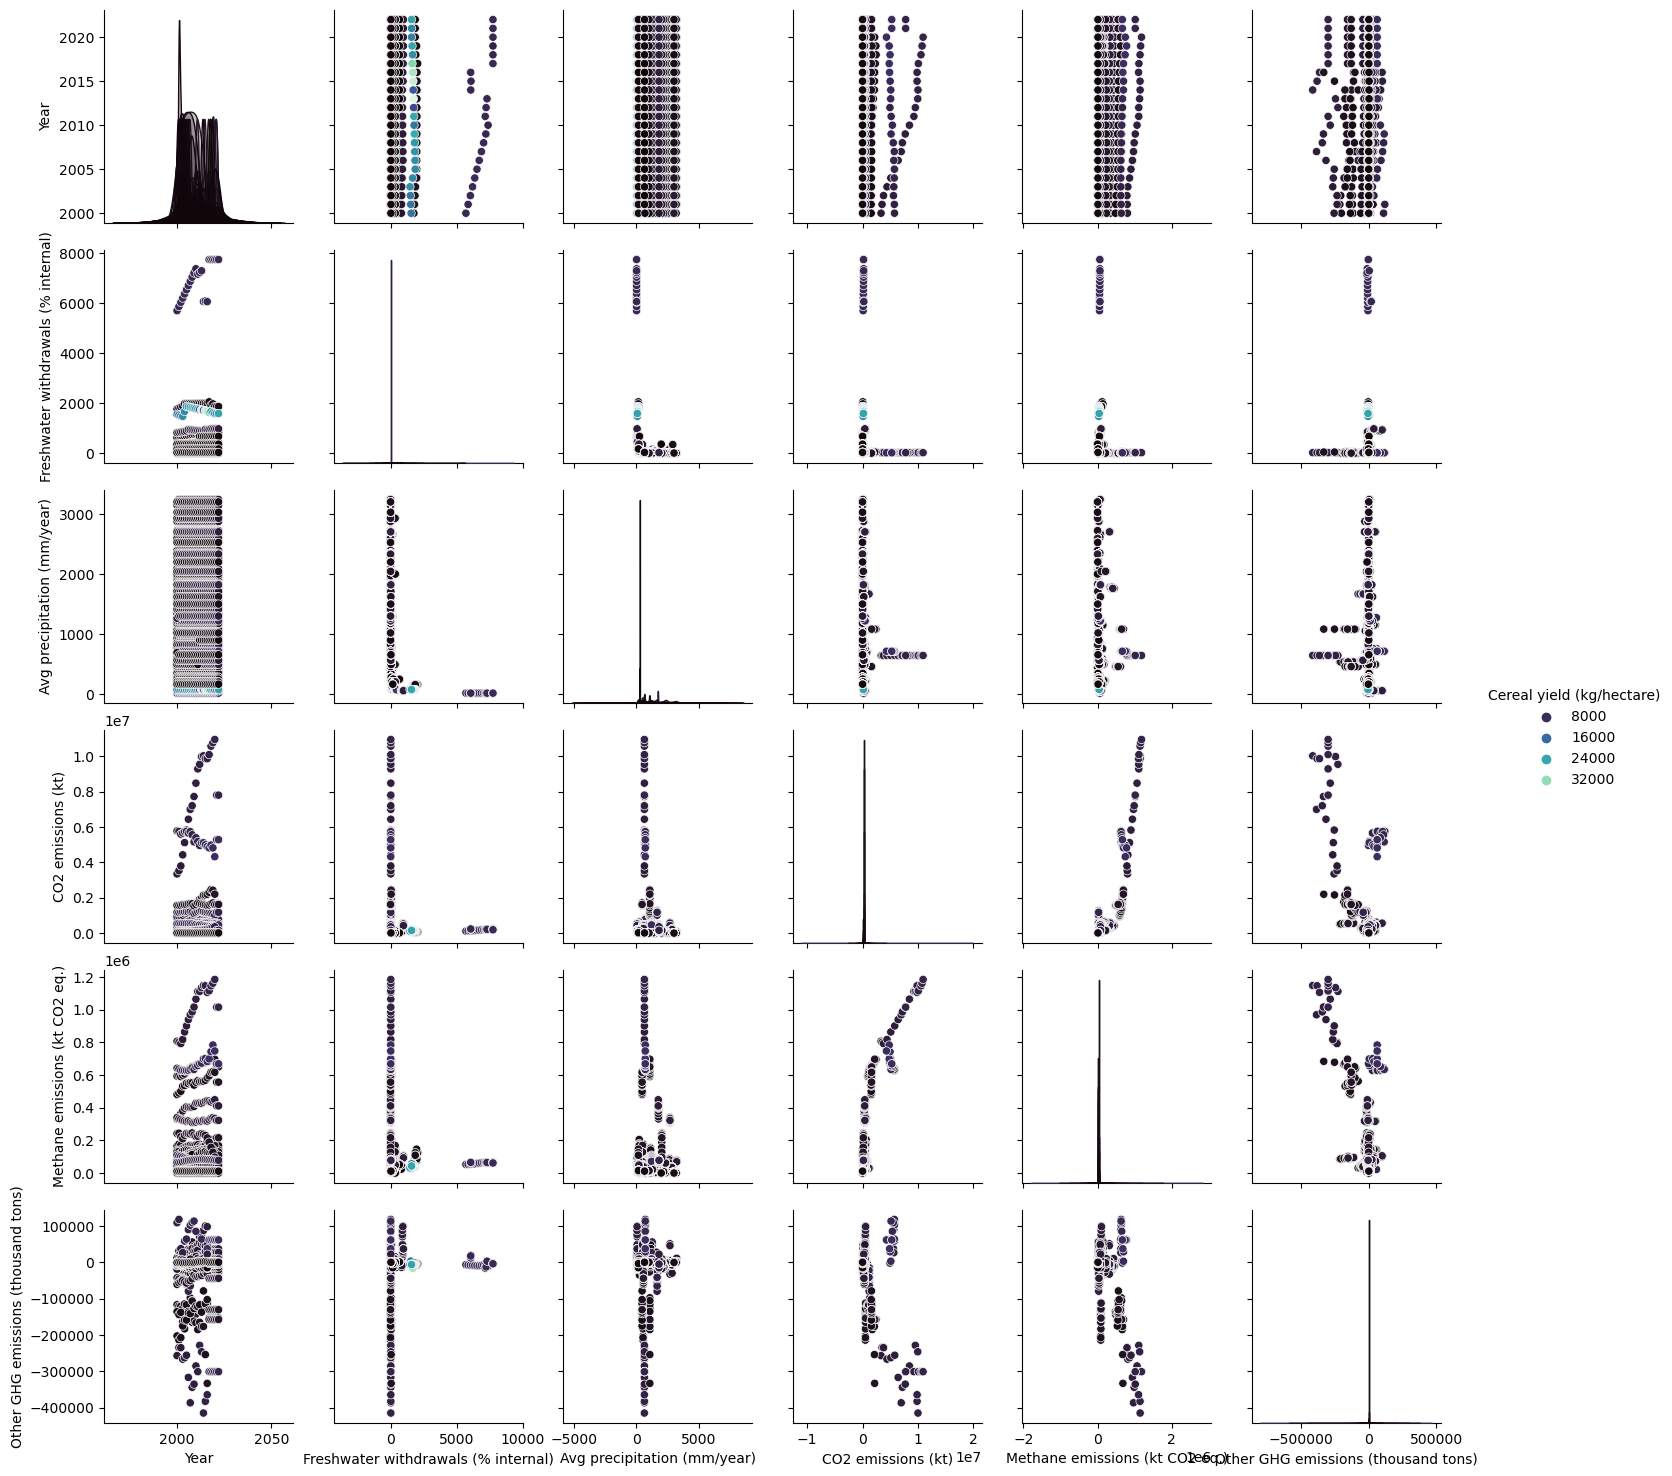

In [41]:
sns.pairplot(data = df2, hue = 'Cereal yield (kg/hectare)', kind = 'scatter', palette = 'mako')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Freshwater withdrawals (% internal)'}>,
        <Axes: title={'center': 'Avg precipitation (mm/year)'}>],
       [<Axes: title={'center': 'CO2 emissions (kt)'}>,
        <Axes: title={'center': 'Cereal yield (kg/hectare)'}>,
        <Axes: title={'center': 'Methane emissions (kt CO2 eq.)'}>],
       [<Axes: title={'center': 'Other GHG emissions (thousand tons)'}>,
        <Axes: >, <Axes: >]], dtype=object)

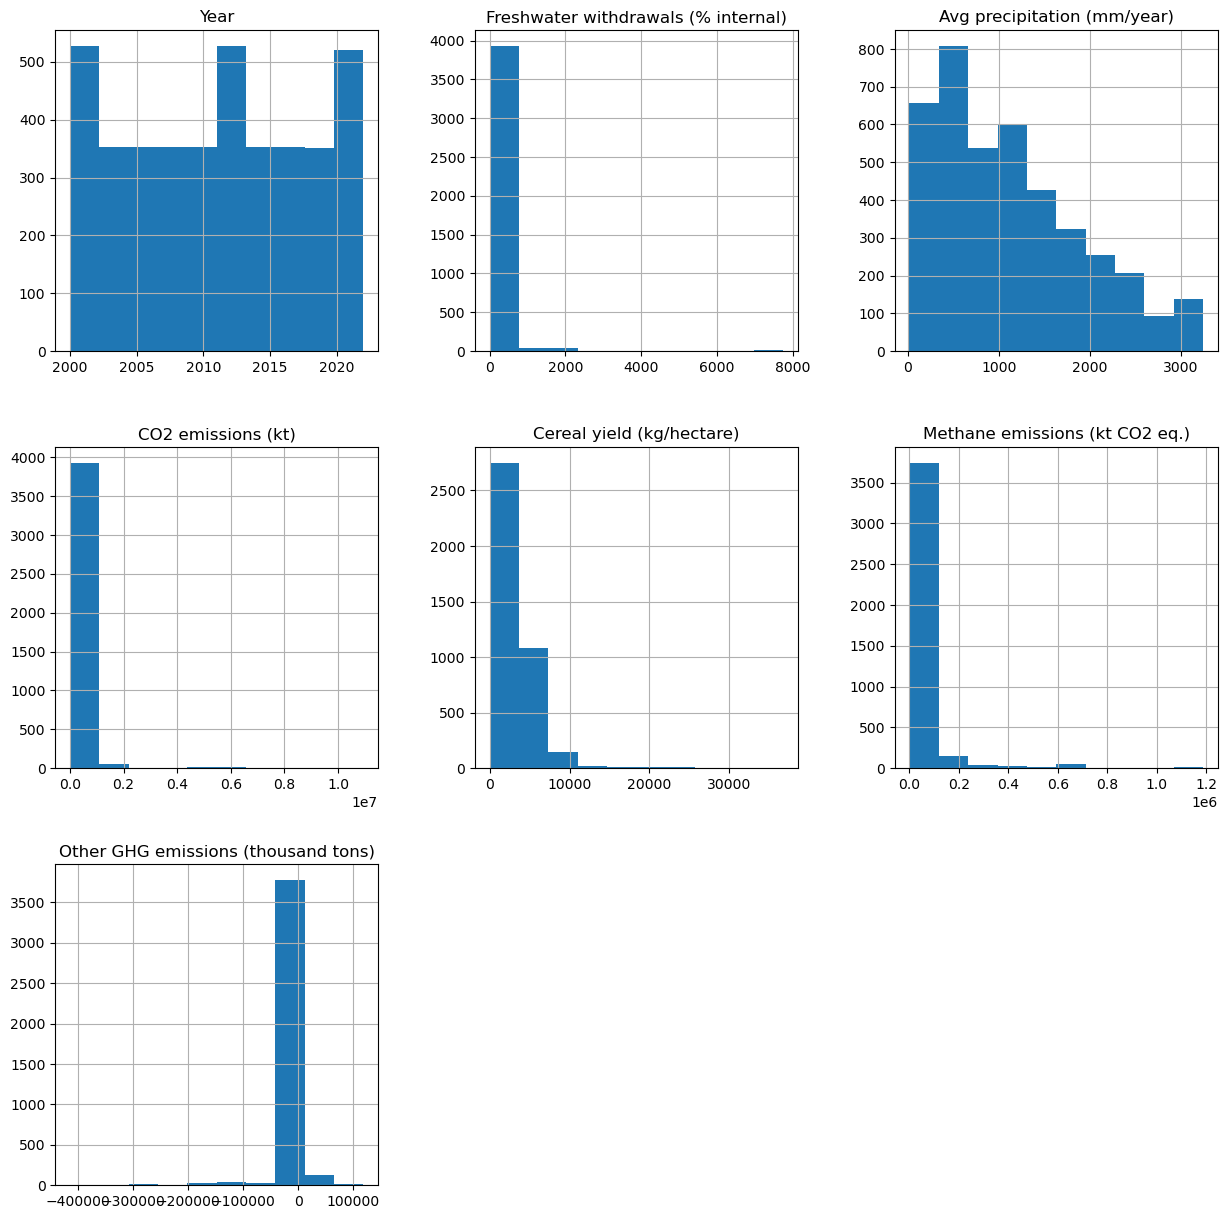

In [42]:
df2.hist(figsize = (15, 15))

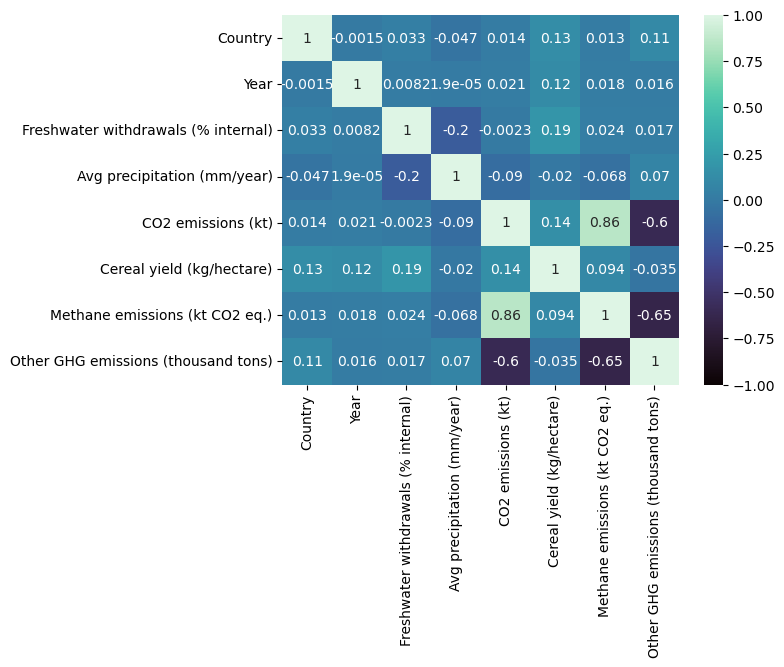

In [43]:
hm = df2.copy()

cat_col = hm.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col :
    hm[col] = label_encoder.fit_transform(hm[col])

# Confusion Matrix 
cm = sns.heatmap(hm.corr(), annot = True, cmap='mako', vmin=-1, vmax=1)
plt.show()

In [44]:
px.scatter(df2, x = 'Cereal yield (kg/hectare)', y = 'Methane emissions (kt CO2 eq.)', color = 'Country', template = 'plotly_dark') 

In [45]:
px.scatter(df2, x = 'Cereal yield (kg/hectare)', y = 'CO2 emissions (kt)', color = 'Country', template = 'plotly_dark') 

In [46]:
px.scatter(df2, x = 'Cereal yield (kg/hectare)', y = 'Freshwater withdrawals (% internal)', color = 'Country', template = 'plotly_dark') 

In [47]:
px.scatter(df2, x = 'Cereal yield (kg/hectare)', y = 'Avg precipitation (mm/year)', color = 'Country', template = 'plotly_dark') 

In [48]:
px.scatter(df2, x = 'Cereal yield (kg/hectare)', y = 'Other GHG emissions (thousand tons)', color = 'Country', template = 'plotly_dark') 

In [49]:
fig = px.box(df2, x='Country', y='Cereal yield (kg/hectare)', color='Country', 
             labels={'Cereal yield (kg/hectare)': 'Cereal yield (kg/hectare)', 'Country': 'Country'},
             template='plotly_dark', title='Cereal Yield Distribution Across Countries')
fig.show()

In [50]:
fig = px.choropleth(df2, locations='Country', locationmode='country names', color='Cereal yield (kg/hectare)',
                    hover_name='Country', title='Cereal Yield by Country',
                    color_continuous_scale=px.colors.sequential.Viridis, template='plotly_dark')
fig.show()

In [51]:
fig = px.scatter(df2, x='CO2 emissions (kt)', y='Cereal yield (kg/hectare)', color='Country', 
                 labels={'CO2 emissions (kt)': 'Average Rainfall (mm)', 'Cereal yield (kg/hectare)': 'Crop Yield (hg/ha)'},
                 title='CO2 emissions vs. Cereal Yield', template='plotly_dark')
fig.show()

In [52]:
fig1 = px.line(df2.groupby(['Year'])['Cereal yield (kg/hectare)'].mean(), 
               labels = {'value' : 'Cereal yield (kg/hectare)'}, template = 'plotly_dark') 
fig1.show()

In [53]:
fig2 = px.line(df2.groupby(['Year'])['CO2 emissions (kt)'].mean(), 
               labels = {'value' : 'CO2 emissions (kt)'}, template = 'plotly_dark') 
fig2.show()

In [54]:
fig3 = px.line(df2.groupby(['Year'])['Other GHG emissions (thousand tons)'].mean(), 
               labels = {'value' : 'Other GHG emissions (thousand tons)'}, template = 'plotly_dark') 
fig3.show()

In [55]:
fig4 = px.line(df2.groupby(['Year'])['Methane emissions (kt CO2 eq.)'].mean(), 
               labels = {'value' : 'Methane emissions (kt CO2 eq.)'}, template = 'plotly_dark') 
fig4.show()

In [56]:
X = df2.drop(labels = 'Cereal yield (kg/hectare)', axis = 1)
y = df2['Cereal yield (kg/hectare)']

# Convert data into dummy variables 
X = pd.get_dummies(X)

In [57]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
X_train.head()

Year  Freshwater withdrawals (% internal)  Avg precipitation (mm/year)  \
4635   2002                            96.000000                        589.0   
5544   2011                            12.922090                       1054.0   
10062  2006                             5.724257                       1537.0   
9136   2019                             0.132625                       2526.0   
4352   2022                             1.093750                       1577.0   

       CO2 emissions (kt)  Methane emissions (kt CO2 eq.)  \
4635         55599.900000                     8729.389159   
5544         37098.900000                    16872.774030   
10062        45479.300000                     5559.279111   
9136          1038.800000                     3550.175785   
4352           241.461905                     1090.782185   

       Other GHG emissions (thousand tons)  Country_Afghanistan  \
4635                          -2304.248047                False   
5544                         -17727.100952                False   
10062                          -387.308594                False   
9136                           -266.394473                False   
4352                             33.167857                False   

       Country_Albania  Country_Algeria  Country_Angola  ...  \
4635             False            False           False  ...   
5544             False            False           False  ...   
10062            False            False           False  ...   
9136             False            False           False  ...   
4352             False            False           False  ...   

       Country_United Kingdom  Country_United States  Country_Uruguay  \
4635                    False                  False            False   
5544                    False                  False            False   
10062                   False                  False            False   
9136                    False                  False            False   
4352                    False                  False            False   

       Country_Uzbekistan  Country_Vanuatu  Country_Venezuela, RB  \
4635                False            False                  False   
5544                False            False                  False   
10062               False            False                  False   
9136                False            False                  False   
4352                False            False                  False   

       Country_Viet Nam  Country_Yemen, Rep.  Country_Zambia  Country_Zimbabwe  
4635              False                False           False             False  
5544              False                False           False             False  
10062             False                False           False             False  
9136              False                False           False             False  
4352              False                False           False             False  

[5 rows x 182 columns]

In [59]:
results = []

# List of machine learning models that will be trained  
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state = 1)),
    ('Random Forest', RandomForestRegressor(random_state = 1)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 1)),
    ('XGBoost', XGBRegressor(random_state = 1)),
    ('Bagging Regressor', BaggingRegressor(n_estimators = 100, random_state = 1)),  
    ('KNN', KNeighborsRegressor(n_neighbors = 10))]

In [60]:
# Loops through the list of machine learning models above  
for name, model in models :
    # Train Model  
    model.fit(X_train, y_train)  
    # Make Predictions   
    y_pred = model.predict(X_test)                      
    
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    # Add all metrics of model to a list    
    results.append((name, accuracy, MSE, R2_score))     
    
    acc = (model.score(X_train , y_train) * 100)
    print(f'Accuracy of {name} Model Train is {acc:.2f}')
    acc = (model.score(X_test , y_test) * 100)
    print(f'Accuracy of the {name} Model Test is {acc:.2f}')  
    
    data = {'y_test' : [y_test], 
            'y_pred' : [y_pred]} 
    data_df = pd.DataFrame(data)
    
    fig = px.scatter(data_df, x = y_test, y = y_pred, 
                     labels = {'x' : 'Actual Values', 'y' : 'Predicted Values'},  
                     trendline = 'ols', trendline_color_override = 'red', 
                     template = 'plotly_dark')
    fig.show()

Accuracy of Linear Regression Model Train is 89.31
Accuracy of the Linear Regression Model Test is 91.31


Accuracy of Decision Tree Model Train is 100.00
Accuracy of the Decision Tree Model Test is 87.57


Accuracy of Random Forest Model Train is 99.06
Accuracy of the Random Forest Model Test is 92.77


Accuracy of Gradient Boost Model Train is 88.33
Accuracy of the Gradient Boost Model Test is 82.20


Accuracy of XGBoost Model Train is 98.25
Accuracy of the XGBoost Model Test is 93.47


Accuracy of Bagging Regressor Model Train is 99.06
Accuracy of the Bagging Regressor Model Test is 92.82


Accuracy of KNN Model Train is 73.12
Accuracy of the KNN Model Test is 73.32


In [61]:
# Dataframe consisting of metrics of all the models   
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'MSE', 'R2_score'])
# Add red and green highlights in the dataframe to display best and worst performing models  
results_format_df = results_df.style.highlight_max(subset = ['Accuracy', 'R2_score'], color = 'green').highlight_min(subset = ['MSE'], color = 'green').highlight_max(subset = ['MSE'], color = 'red').highlight_min(subset = ['Accuracy','R2_score'], color = 'red')
display(results_format_df)

In [62]:
results = [] 
fold_df = pd.DataFrame()

# Loops through the list of machine learning models   
for name, model in models :
    # Train Model   
    model.fit(X_train, y_train)
    # Make Predictions     
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    # Add all metrics of model to a list      
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))
    
    print(name)
    kf = KFold(n_splits = 10, shuffle = True)
    scores = cross_val_score(model, X, y, cv = kf)
    
    # Print out the CV Scores for each fold  
    for fold, score in enumerate(scores) :
        print(f'Fold {fold + 1}: {score}')
        temp_df = pd.DataFrame({'Name' : name, 'Fold' : [fold + 1], 'Score' : [score]}) 
        dfs = [fold_df, temp_df] 
        fold_df = pd.concat(dfs, ignore_index = True)

    # Print out the Mean CV scores for each model     
    mean_score = np.mean(scores)
    print(f'Mean Score: {mean_score}')
    print('=' * 30)

Linear Regression
Fold 1: 0.8785697042001226
Fold 2: 0.8779258912203949
Fold 3: 0.9140095454155839
Fold 4: 0.8645167255585361
Fold 5: 0.935961489321461
Fold 6: 0.866612768390741
Fold 7: 0.8816561793306695
Fold 8: 0.8734746717646638
Fold 9: 0.85179174550557
Fold 10: 0.9204200549240146
Mean Score: 0.8864938775631757
Decision Tree
Fold 1: 0.8671116828463541
Fold 2: 0.8331240910048657
Fold 3: 0.9380858114819912
Fold 4: 0.9533288787517069
Fold 5: 0.9358779314212937
Fold 6: 0.9173514224862132
Fold 7: 0.8847268389123006
Fold 8: 0.9147436782389614
Fold 9: 0.8331206870488971
Fold 10: 0.8535032522450181
Mean Score: 0.8930974274437602
Random Forest
Fold 1: 0.9184170225440818
Fold 2: 0.9655966530165482
Fold 3: 0.957940363970822
Fold 4: 0.966759257524627
Fold 5: 0.9789687439029263
Fold 6: 0.926454919447061
Fold 7: 0.9282026257156861
Fold 8: 0.8894515566573522
Fold 9: 0.9579178732997508
Fold 10: 0.8928421003645812
Mean Score: 0.9382551116443436
Gradient Boost
Fold 1: 0.8738937581444353
Fold 2: 0.826

In [63]:
for i in range(1, 8) : 
    plot_fold_df = fold_df.iloc[i * 10 - 10 : i * 10] 
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = plot_fold_df['Fold'],
                             y = plot_fold_df['Score'],
                             mode = 'lines+markers',
                             name = 'Accuracy'))

    fig.update_layout(title = {'text' : plot_fold_df['Name'].iloc[i],
                       'xanchor' : 'center',
                       'yanchor' : 'top',
                       'x' : 0.5},
                       xaxis_title = 'Fold',
                       yaxis_title = 'Score',
                       title_font = dict(size = 20))
 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [64]:
# Dataframe consisting of metrics of all the models     
result_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
# Add red and green highlights in the dataframe to display best and worst performing models  
result_format_df = result_df.style.highlight_max(subset = ['Accuracy','R2_score'], color = 'green').highlight_min(subset = ['MSE','MAE','MAPE'], color = 'green').highlight_max(subset = ['MSE','MAE','MAPE'], color = 'red').highlight_min(subset = ['Accuracy','R2_score'], color = 'red')
display(result_format_df)

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the XGBoost model
xgboost_model = XGBRegressor(random_state=1)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


In [66]:
# Best parameters found from GridSearchCV
best_params = {
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 200,
    'subsample': 0.8
}

# Initialize the XGBRegressor with the best parameters
xgboost_model = XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=1
)

# Fit the model to the training data
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [67]:
y_pred_xgb = xgboost_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R2 Score : {r2_xgb:.2f}")

Mean Squared Error (MSE): 417697.42
R2 Score : 0.94


In [68]:
fig_xgb = px.scatter(x=y_test, y=y_pred_xgb, 
                         labels={'x': 'Valeurs Réelles', 'y': 'Valeurs Prédites'},  
                         trendline='ols', trendline_color_override='red', 
                         template='plotly_dark')
fig_xgb.update_layout(title="Predictions")
fig_xgb.show()

In [69]:
import joblib  
# Save the model 
joblib.dump(xgboost_model, 'cereal_prediction_model.pkl')

['cereal_prediction_model.pkl']

In [70]:
# Load the trained model and LabelEncoders
yield_prediction = joblib.load('cereal_prediction_model.pkl')

In [71]:
y_pred = yield_prediction.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 417697.41957180476
Mean Absolute Error (MAE): 315.109477972486
R-squared (R²): 0.943523574434687


In [72]:
# Exemple de seuils
yield_threshold = df['Cereal yield (kg/hectare)'].quantile(0.1)  # 10e percentile pour rendement très faible
emissions_threshold = df[['CO2 emissions (kt)', 'Methane emissions (kt CO2 eq.)', 'Other GHG emissions (thousand tons)', 'Freshwater withdrawals (% internal)',
       'Avg precipitation (mm/year)']].quantile(0.9)  # 90e percentile pour émissions élevées

In [73]:
def recommend_countries(df):
    # Filtrer les pays avec des rendements très faibles
    low_yield_countries = df2[df2['Cereal yield (kg/hectare)'] < yield_threshold]
    
    # Filtrer les pays avec des émissions très élevées
    high_emissions_countries = df2[
        (df2['CO2 emissions (kt)'] > emissions_threshold['CO2 emissions (kt)']) |
        (df2['Methane emissions (kt CO2 eq.)'] > emissions_threshold['Methane emissions (kt CO2 eq.)']) |
        (df2['Other GHG emissions (thousand tons)'] > emissions_threshold['Other GHG emissions (thousand tons)']) |
        (df2['Freshwater withdrawals (% internal)'] > emissions_threshold['Freshwater withdrawals (% internal)']) |
        (df2['Avg precipitation (mm/year)'] > emissions_threshold['Avg precipitation (mm/year)']) 
    ]
    
    # Combiner les deux recommandations
    recommended_countries = pd.concat([low_yield_countries, high_emissions_countries]).drop_duplicates()
    
    return recommended_countries


In [74]:
recommended_countries = recommend_countries(df2)
print("Pays recommandés pour amélioration :")
print(recommended_countries[['Country', 'Cereal yield (kg/hectare)', 'CO2 emissions (kt)', 'Methane emissions (kt CO2 eq.)', 'Other GHG emissions (thousand tons)', 'Freshwater withdrawals (% internal)', 'Avg precipitation (mm/year)']])

Pays recommandés pour amélioration :
           Country  Cereal yield (kg/hectare)  CO2 emissions (kt)  \
276         Angola                      564.4        16204.160000   
277         Angola                      585.4        15955.900000   
278         Angola                      627.2        15689.500000   
279         Angola                      646.1        16764.800000   
280         Angola                      491.7        17453.600000   
...            ...                        ...                 ...   
11599  Yemen, Rep.                      784.2        13552.200000   
11603  Yemen, Rep.                      864.9        11194.800000   
11604  Yemen, Rep.                     1423.4         9960.100000   
11605  Yemen, Rep.                     1524.8        18715.280952   
11606  Yemen, Rep.                      871.4        18715.280952   

       Methane emissions (kt CO2 eq.)  Other GHG emissions (thousand tons)  \
276                      27459.282500                   

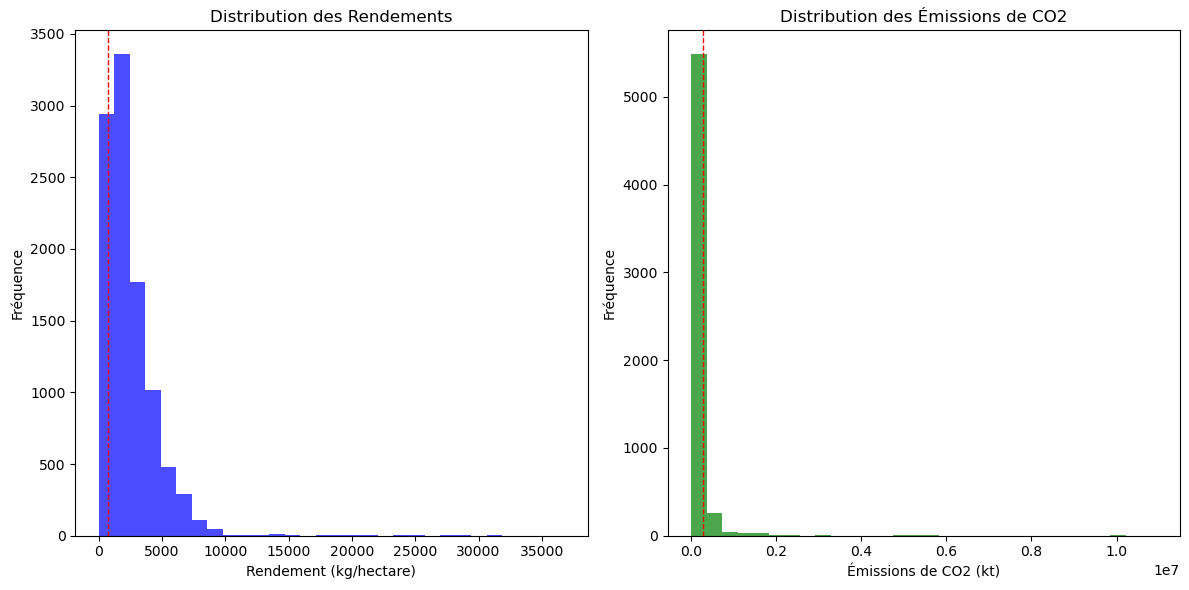

In [75]:
import matplotlib.pyplot as plt

# Visualiser les rendements et émissions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Cereal yield (kg/hectare)'].dropna(), bins=30, color='blue', alpha=0.7)
plt.axvline(yield_threshold, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution des Rendements')
plt.xlabel('Rendement (kg/hectare)')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
plt.hist(df['CO2 emissions (kt)'].dropna(), bins=30, color='green', alpha=0.7)
plt.axvline(emissions_threshold['CO2 emissions (kt)'], color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution des Émissions de CO2')
plt.xlabel('Émissions de CO2 (kt)')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()